<a href="https://colab.research.google.com/github/satishgc227/git-test/blob/master/OTTO_RECOMMENDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task overview :
The aim of this competition is to predict e-commerce clicks, cart additions, and orders. You'll build a multi-objective recommender system based on previous events in a user session.

Current recommender systems consist of various models with different approaches, ranging from simple matrix factorization to a transformer-type deep neural network. However, no single model exists that can simultaneously optimize multiple objectives. In this competition, you’ll build a single entry to predict click-through, add-to-cart, and conversion rates based on previous same-session events.

Import libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [3]:
#!pip install zipfile36

In [4]:
# if sys.version_info >= (3, 6):
#     import zipfile
# else:
#     import zipfile36 as zipfile


# file_name="otto-recommender-system.zip"

In [5]:
# # opening the zip file in READ mode
# with zipfile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
  
#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv("/content/traian csv.csv")

In [8]:
df

,session,aid,ts,type
0,8000000,766953,1.660420e+12,clicks
1,8000000,1586093,1.660420e+12,clicks
2,8000000,1586093,1.660420e+12,clicks
3,8000000,682970,1.660420e+12,clicks
4,8000000,799794,1.660420e+12,clicks
...,...,...,...,...
416135,8038822,956142,1.661710e+12,carts
416136,8038822,956142,1.661710e+12,clicks
416137,8038823,1228211,1.660430e+12,clicks
416138,8038823,1720152,1.660430e+12,clicks


Data preprocessing:

In [9]:
df.isnull().sum()

session    0
aid        0
ts         1
type       1
dtype: int64

In [10]:
df.dropna()

,session,aid,ts,type
0,8000000,766953,1.660420e+12,clicks
1,8000000,1586093,1.660420e+12,clicks
2,8000000,1586093,1.660420e+12,clicks
3,8000000,682970,1.660420e+12,clicks
4,8000000,799794,1.660420e+12,clicks
...,...,...,...,...
416134,8038822,956142,1.661710e+12,clicks
416135,8038822,956142,1.661710e+12,carts
416136,8038822,956142,1.661710e+12,clicks
416137,8038823,1228211,1.660430e+12,clicks


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416140 entries, 0 to 416139
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   session  416140 non-null  int64  
 1   aid      416140 non-null  int64  
 2   ts       416139 non-null  float64
 3   type     416139 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 12.7+ MB


In [12]:
# import json
# f=open("/content/test.jsonl")
# chunks=f.read()
# chunks

In [13]:
#print(chunks)

In [14]:
# import pandas as pd
# import json
# import glob
# from pandas.io.json import json_normalize

# json_files = glob.glob("*.json")
# dfs = []
# for file in json_files:
#     with open("/content/test.jsonl") as f:
#         for line in f.readlines():
#             df = pd.json_normalize(json.loads(line))
#             list_= ['','Item.metadata.M.timestamp.S','Item.sensor.M.celcius.N','Item.sensor.M.water.N']
#             df = df.loc[:, df.columns.isin(list_)]
#             dfs.append(df)
# df_combine = pd.concat(dfs, sort=False)
# df_combine.to_csv('json_to_raw.csv',index= None)

In [15]:
# import zipfile
# from google.colab import drive

# drive.mount('/content/drive/')

# zip_ref = zipfile.ZipFile("/content/drive/Othercomputers/My Laptop/Downloads/train.jsonl.zip", 'r')
# zip_ref.extractall("/content/drive/Othercomputers/My Laptop/Downloads/tmp")
# zip_ref.close()

In [16]:
# import json
# dd=open("/content/drive/Othercomputers/My Laptop/Downloads/tmp/train.jsonl")

In [17]:
# import pandas as pd
# chunks=pd.read_json(dd,lines=True, chunksize=1000)

In [18]:
#fg=pd.DataFrame(chunks)

In [19]:
df.shape

(416140, 4)

In [20]:
df['session'].unique()


array([8000000, 8000001, 8000002, ..., 8038821, 8038822, 8038823])

In [21]:
df.session.unique().shape

(38824,)

In [22]:
s=df.groupby('session')['aid','ts','type'].count()
print(s)

         aid   ts  type
session                
8000000    6    6     6
8000001    2    2     2
8000002    7    7     7
8000003    5    5     5
8000004  151  151   151
...      ...  ...   ...
8038819    2    2     2
8038820    2    2     2
8038821   15   15    15
8038822   46   46    46
8038823    3    2     2

[38824 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [23]:
df.ts

0         1.660420e+12
1         1.660420e+12
2         1.660420e+12
3         1.660420e+12
4         1.660420e+12
              ...     
416135    1.661710e+12
416136    1.661710e+12
416137    1.660430e+12
416138    1.660430e+12
416139             NaN
Name: ts, Length: 416140, dtype: float64

In [24]:
import datetime
d=df['ts'].max()
f=df['ts'].min()
f

1660420000000.0

In [25]:
datetime.datetime.fromtimestamp(f/1000),datetime.datetime.fromtimestamp(d/1000)

(datetime.datetime(2022, 8, 13, 19, 46, 40),
 datetime.datetime(2022, 8, 28, 20, 53, 20))

In [26]:
df['ts'].values

array([1.66042e+12, 1.66042e+12, 1.66042e+12, ..., 1.66043e+12,
       1.66043e+12,         nan])

In [27]:
df['ts'].values[0]

1660420000000.0

In [28]:
session_duration = df.groupby('session').apply(lambda x: (x['ts'].values[-1] - x['ts'].values[0])/(1000*60*60))
session_duration.max()

361.1111111111111

Let's convert timestamp to the readable time:

In [29]:
df['ts']=pd.to_datetime(df['ts'])

In [30]:
b=df['ts']

In [31]:
print(f'Years:{b.dt.year.unique()} , \n Months"{b.dt.month.unique()}, \n Days:{b.dt.day.unique()} ')

Years:[1970.   nan] , 
 Months"[ 1. nan], 
 Days:[ 1. nan] 


In [32]:
df['ts_conv']=b


In [33]:
df_grouped= df.groupby('session')['ts_conv'].agg([min,max])

In [34]:
df_grouped['diff']=df_grouped['max']-df_grouped['min']

In [35]:
df_grouped['diff']

session
8000000          0 days 00:00:00
8000001   0 days 00:00:00.680000
8000002          0 days 00:00:00
8000003   0 days 00:00:00.950000
8000004   0 days 00:00:01.290000
                   ...          
8038819          0 days 00:00:00
8038820          0 days 00:00:00
8038821   0 days 00:00:01.290000
8038822   0 days 00:00:01.280000
8038823          0 days 00:00:00
Name: diff, Length: 38824, dtype: timedelta64[ns]

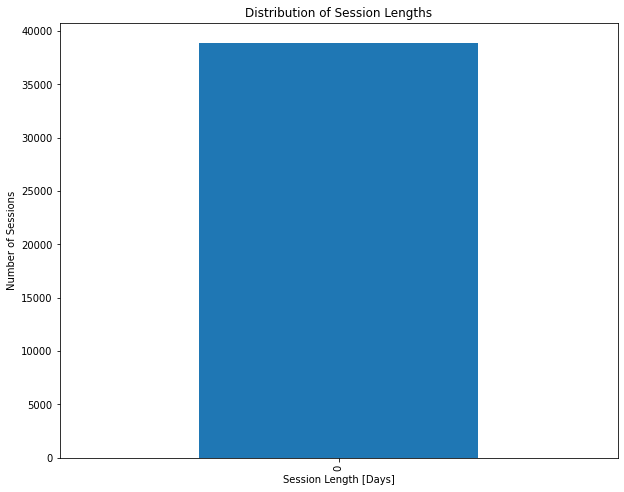

In [36]:
df_grouped['diff'].dt.days.sort_values().value_counts().plot(kind='bar', figsize=(10,8), title='Distribution of Session Lengths')
plt.xlabel('Session Length [Days]')
plt.ylabel('Number of Sessions')
plt.show()

In [37]:
idx_0=df_grouped.query('diff.dt.days==0').index.to_list()

In [38]:
# ind_0

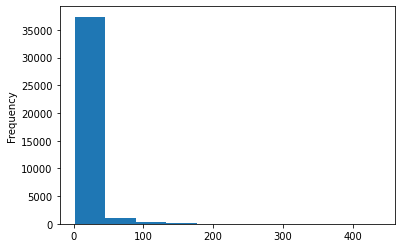

In [39]:
import matplotlib.pyplot as plt


df.groupby('session').size().plot.hist()


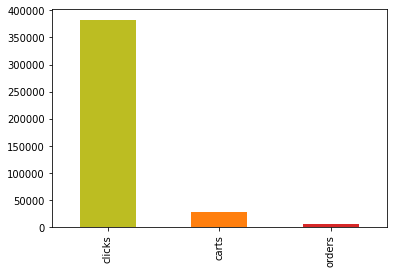

In [40]:
colors = ['tab:olive', 'tab:orange', 'tab:red']


df.query('session in @idx_0').type.value_counts(normalize=False).plot(kind='bar', color=colors)


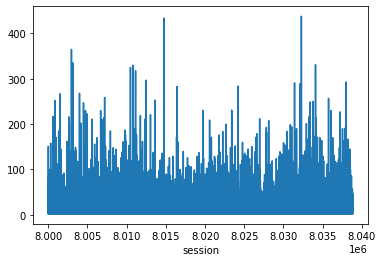

In [41]:
df.groupby('session').size().plot()

Let us find the last actions in a session:


In [43]:
list_last = [i[-1] for i in df.groupby('session').agg({'type' : lambda x: list(x)}).type.to_list()]


In [49]:
list_all = [item for sublist in df.groupby('session').agg({'type': lambda x: list(x)}).type.to_list() for item in sublist]   

Let's see how likely the session ends with order :


In [57]:
list_all.count('clicks'),list_all.count('orders'),list_all.count('carts')

(382518, 6151, 27470)

In [66]:
for i in ['clicks','orders','carts']:
  print(f'it is {np.round((list_last.count(i)*len(list_all))/(list_all.count(i)*len(list_last)),1)} likely that the last actions were {i}')


it is 1.0 likely that the last actions were clicks
it is 1.6 likely that the last actions were orders
it is 0.5 likely that the last actions were carts


Hence it is likely that the session ends with half probability of carts but twice as that of orders.

Building an LSTM to predict the future aids: